# RVC 1, Ch2.1

In [1]:
# Works best with jupyter-notebook

In [2]:
%matplotlib notebook 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np

from spatialmath import *
from spatialmath.base import *
from roboticstoolbox import *
import matplotlib.pyplot as plt

#!pip3 install sympy testresources pgraph

np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

## Lec 01.7 (Ch 2.1) 2D Rotation and Translation

Create a homogenous transformation representation of a pure translation


In [3]:
# https://petercorke.github.io/spatialmath-python/func_2d.html?highlight=transl2#spatialmath.base.transforms2d.transl2
T1 = transl2(1, 2)
print(T1)

[[       1        0        1]
 [       0        1        2]
 [       0        0        1]]


Create a homogenous transformation representation a pure rotation

In [6]:
R1 = trot2(0.5236)
print(R1)
R1 = trot2(30,'deg')
print(R1)

[[   0.866     -0.5        0]
 [     0.5    0.866        0]
 [       0        0        1]]
[[   0.866     -0.5        0]
 [     0.5    0.866        0]
 [       0        0        1]]


Combine a 2D homogenous tranformation matrix with a rotation and translation

In [9]:
A_T_B = transl2(1, 2)@trot2(30, 'deg')
print(A_T_B)

[[   0.866     -0.5        1]
 [     0.5    0.866        2]
 [       0        0        1]]


Special Eucliden SE(2) command can combine the translation and rotation into a homogeneous matrix directly

In [14]:

T1 = SE2(1,2,30, unit='deg') # yields an SE object
print(T1)

T1 = SE2(1,2,0.5236)
print(T1)

<class 'spatialmath.pose2d.SE2'>
   0.866025   -0.5         1            
   0.5         0.866025    2            
   0           0           1            

   0.866025   -0.500001    1            
   0.500001    0.866025    2            
   0           0           1            



In [15]:
# Setup plotting capabilities for Jupyterlab
# Run as shell command with !
#!pip3 install ipympl

Getting ready to plot. Set the axes

<IPython.core.display.Javascript object>


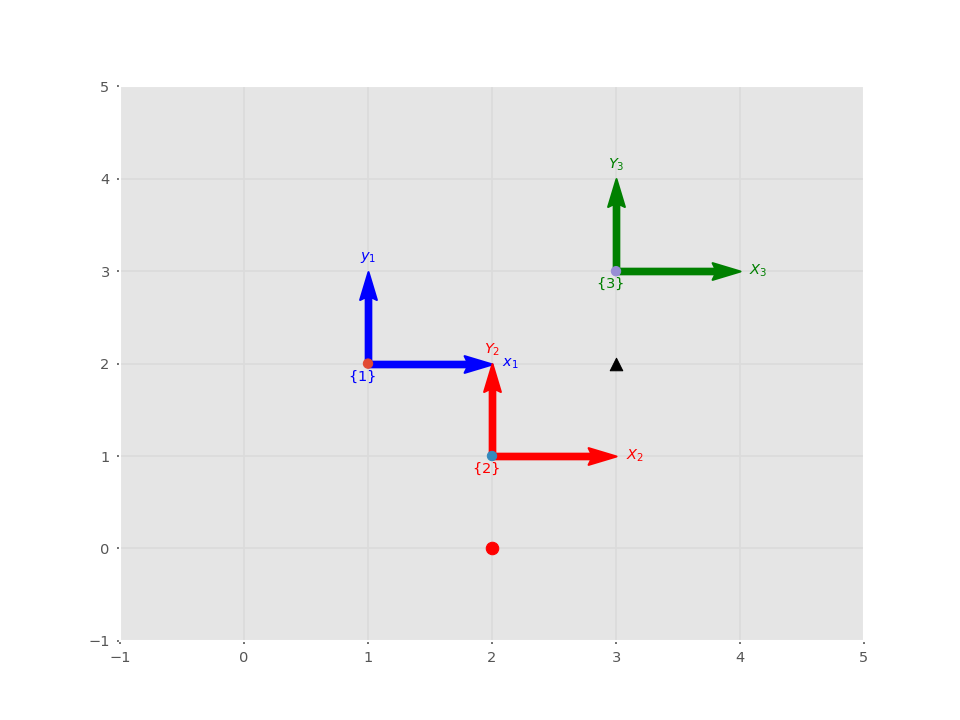

In [16]:
fig = plt.figure()   # Open a new figure
plt.axes( xlim=(-1,5), ylim=(-1,5) )

In [17]:
# Create new coordinates
T1 = transl2(1, 2)

Plot the homogenous transform with trplot2

In [18]:
# https://petercorke.github.io/spatialmath-python/func_2d.html?highlight=trplot#spatialmath.base.transforms2d.trplot2
trplot2(T1, frame='1', color='blue', labels=('x','y'),block=False); # assign color and labels

In [19]:
# Can also visualize composable transformations
T2 = transl2(2, 1)
trplot2(T2, frame='2', color='red',block=False);

How would a compound transformation T1 followed by T2 look like

In [20]:
T3 = T1@T2
trplot2(T3, frame='3', color='green', block=False);

In [21]:
# Create a point W_P wrt to the world
P = np.array( [[3],[2]] )
plt.scatter( P[0].item(),P[1].item(), c='black',marker='^' );

In [23]:
# Where, 1_T_W = inv(W_T_1)
# 1_P = 1_T_W * W_P
#P1 = np.matmul(np.linalg.inv(T1), e2h(P))
P1 = np.linalg.inv(T1) @ e2h(P)
print(P1)

[       2        0        1]


In [24]:
# Plot the point
plt.scatter( h2e(P1)[0] ,h2e(P1)[1] ,c='red');
print(h2e(P1))

[       2        0]


In [25]:
# 2_P = 2_T_W * W_P
h2e( T @ e2h(v))
P2 = np.matmul(np.linalg.inv(T2),e2h(P))
print(P2)

[       1        1        1]


Other more compact ways to do the transformation are:

In [12]:
T = trotx(1.57) # homogeneous transformation
v = [1, 1, 1]   # 3D vector

print( h2e( T @ e2h(v)) )
print( homtrans(T, v) )

[ 1.         -0.99920336  1.00079601]
[ 1.         -0.99920336  1.00079601]
